# Royal Family Popularity Ranker 
---
![IMAGE][def2]
## UK ONS Live Birth Dataset 1996-2021
---
Popularity is based on the number of babies named after royalty.

To compare names against the Office for National Statistics UK baby name dataset, alter the code in the cell below.

>females = ["girl name","another girl"]
>
>males = ["boy name","another boy name","another boy"]

Charts will be plotted using Bokeh, Matplotlib, Seaborn & Plotly

Using the ONS live birth data 1996-2021 [www.ons.gov.uk][def]

[def]: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths

Photo by <a href="https://unsplash.com/@markusspiske?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Markus Spiske</a> on <a href="https://unsplash.com/s/photos/crown-jewels?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
---
[def2]: family.jpg
<!-- [def2]: https://www.happyafloat.com/images/family.jpg !-->

## Setup names to compare

In [1]:
#Setup names for family.
females = ["Meghan","Catherine"]
males = ["Harry","William"]
family = females + males

## IMPORTS ##

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.models import NumeralTickFormatter
from bokeh.io import output_notebook
output_notebook()

import plotly.express as px
import plotly.io as pio 

import seaborn as sns


Loading BokehJS ...

## Create lists for later data wrangling

In [3]:
#Create some lists to select or reformat data later
count_cols = []     # "1996 Count", ... "2021 Count" ** Used to drop/rename columns
rank_cols = []      # "1996 Rank", ... "2021 Rank" ** Used to drop/rename columns
years = []          # "1996", ... "2021" ** Used to wrangle data and rename columns
colours = ["red","blue","yellow","orange","brown","cyan","black"] # for charts
for f in range(1996,2022):
    count_cols.append(str(f) + ' Count')
    rank_cols.append(str(f) + ' Rank')
    years.append(str(f))


In [4]:
#Import ONS data
df1 = pd.read_excel("babynames1996to2021.xlsx","1",skiprows =7)     # Boys names in workbook 1
df2 = pd.read_excel( 'babynames1996to2021.xlsx',"2",skiprows =7)    # Girls names in workbook 2
df1 = df1.set_index("Name")
df2 = df2.set_index("Name") 


In [5]:
#Replace NaN with 0
df1 = df1.replace("[x]",0)
df2 = df2.replace("[x]",0)


## Filter our names to new DataFrame

In [6]:
#Filter names from ONS data
Girls = df2.loc[females]
Boys = df1.loc[males]
df_family = pd.concat([Girls, Boys], axis=0)

In [7]:
#Drop rank and count columns
df_family_counts = df_family.drop(columns=rank_cols)
df_family_ranks = df_family.drop(columns=count_cols)

In [8]:
#Rename columns "1996 Count" -> "1996" and "1996 Rank" -> "1996"
df_family_counts.columns = df_family_counts.columns.str.replace(" Count","")
df_family_ranks.columns = df_family_ranks.columns.str.replace(" Rank","")

In [9]:
#Pivot DFs so rows are date observations
df_family_counts = pd.pivot_table(df_family_counts, values = years, columns=["Name"])
df_family_counts.index.name = "Year"
df_family_counts = df_family_counts.reindex(columns=family)

df_family_ranks = pd.pivot_table(df_family_ranks, values = years, columns=["Name"])
df_family_ranks.index.name = "Year"
df_family_ranks = df_family_ranks.reindex(columns=family)

## Tables
---

## UK Ranking

In [10]:
#Display the rank table
df_family_ranks.sort_index(ascending=False).head()

Name,Meghan,Catherine,Harry,William
Year,,,,
2021,1286,457,7,21
2020,710,416,8,20
2019,641,417,5,17
2018,431,419,3,14
2017,797,313,2,11


## Number of Top 20 entries
---

In [11]:
#Display the rank table
for name in family:
    df_temp = df_family_ranks[name]
    print(name + (' ' * (10 - len(name))) +' \t' + str(df_temp[df_temp <= 20].count()))

Meghan     	0
Catherine  	0
Harry      	26
William    	24


## Number of Top 10 entries
---

In [12]:
#Display the rank table
for name in family:
    df_temp = df_family_ranks[name]
    print(name + (' ' * (10 - len(name))) +' \t' + str(df_temp[df_temp <= 10].count()))

Meghan     	0
Catherine  	0
Harry      	19
William    	15


## Number of No 1's
---

In [13]:
#Display the rank table
for name in family:
    df_temp = df_family_ranks[name]
    print(name + (' ' * (10 - len(name))) +' \t' + str(df_temp[df_temp == 1].count()))

Meghan     	0
Catherine  	0
Harry      	2
William    	0


## Highest position in charts
---

In [14]:
#Display the rank table

df_fs = pd.pivot_table(df_family_ranks,columns="Year")
df_fs = df_fs.unstack()
df_fs = df_fs.reset_index()
df_top_rank = pd.DataFrame()
df_low_rank = pd.DataFrame()

for name in family:
    df_tmp = df_fs[df_fs["Name"]==name]
    df_tmp.columns=["Year","Name","Rank"]
    df_tmphigh = (df_tmp[df_tmp["Rank"].min()==df_tmp["Rank"]])
    df_tmplow = (df_tmp[df_tmp["Rank"].max()==df_tmp["Rank"]])
    df_top_rank = pd.concat([df_top_rank,df_tmphigh])
    df_low_rank = pd.concat([df_low_rank,df_tmplow])
    
df_top_rank = df_top_rank.reindex(columns=["Name","Year","Rank"])
df_top_rank = df_top_rank.set_index("Name")
df_top_rank.sort_values(by=["Rank","Year"],ascending = [True,False])

,Year,Rank
Name,,
Harry,2012,1
Harry,2011,1
William,2010,7
William,2006,7
Catherine,1996,68
Meghan,1998,237


## Lowest position in charts
---

In [15]:
df_low_rank = df_low_rank.reindex(columns=["Name","Year","Rank"])
df_low_rank = df_low_rank.set_index("Name")
df_low_rank.sort_values(by=["Rank","Year"])

,Year,Rank
Name,,
Harry,1996,17
Harry,1997,17
William,1996,21
William,2021,21
Catherine,2021,457
Meghan,2021,1286


## Number of UK Babies

In [16]:
df_family_counts.sort_index(ascending=False).head()

Name,Meghan,Catherine,Harry,William
Year,,,,
2021,25,95,3089,2093
2020,52,102,3209,2215
2019,61,101,3823,2667
2018,101,104,4512,3015
2017,49,155,5031,3437


In [17]:
#Create totals DF
df1_totals = df1.drop(columns=rank_cols).sum()
df2_totals = df2.drop(columns=rank_cols).sum()
df1_totals = df1_totals.reset_index()
df2_totals = df2_totals.reset_index()
df_totals = pd.concat([df1_totals, df2_totals], axis=0)
df_totals = df_totals.replace(count_cols,years)
df_totals.columns=["Years","Total"]
#df_totals["date"]=pd.to_datetime(df_totals["Years"])
df_totals = df_totals.groupby("Years").sum()
#df_totals

In [18]:
#Calculate accumulative percentage change
df_family_diff = pd.DataFrame(df_family_counts,copy=True)
temp_col = [] # Build a list of temp columns to drop later
for name in family:
    df_family_diff[name + " Diff"] = df_family_diff[name].diff()
    temp_col.append(name + " Diff")
df_family_diff = df_family_diff.fillna(0)

for name in family:
    df_family_diff[name + " %"] = df_family_diff[name + " Diff"] / df_family_diff[name]
    df_family_diff[name + " %"] = df_family_diff[name + " %"].cumsum()

# Drop the columns not required for plotting
temp_col += family
df_family_diff = df_family_diff.drop(columns=temp_col)

## Bokeh Charts
---

In [19]:
#Chart dimensions
chart_w = 1080
chart_h = 545

In [20]:
source = ColumnDataSource(df_totals)
p = figure(title="Total UK baby names", x_axis_label="Year", y_axis_label="Babies", x_range=years,width=chart_w, height=chart_h)
p.line(source=source, x="Years",y="Total")
show(p)

In [21]:
# create a new plot with a title and axis labels
source = ColumnDataSource(df_family_counts)
p = figure(title="UK baby count for selected names", x_axis_label="", y_axis_label="Babies",x_range=years, width=chart_w, height=chart_h)

for index,name in enumerate(family): 
    p.line(x = "Year", y = name, legend_label=name, line_color=colours[index],line_width=2,source=source)

show(p)

In [22]:
# create a new plot with a title and axis labels
source = ColumnDataSource(df_family_ranks)
p = figure(title="UK baby name rankings", x_axis_label="Year",y_range=(1500,1), y_axis_label="Name UK rank",x_range=years, width=chart_w, height=chart_h)

for index,name in enumerate(family): 
    p.line(x = "Year", y = name, legend_label=name, line_color=colours[index],line_width=2,source=source)

show(p)

In [23]:
# create a new plot with a title and axis labels
source = ColumnDataSource(df_family_diff)
p = figure(title="Name Popularity % Change", x_axis_label="Year", y_axis_label="%",x_range=years, width=chart_w, height=chart_h)

for index,name in enumerate(family): 
    p.line(x = "Year", y = (name + " %"), legend_label=name, line_color=colours[index],line_width=2,source=source)

show(p)

## Matplotlib Charts
---

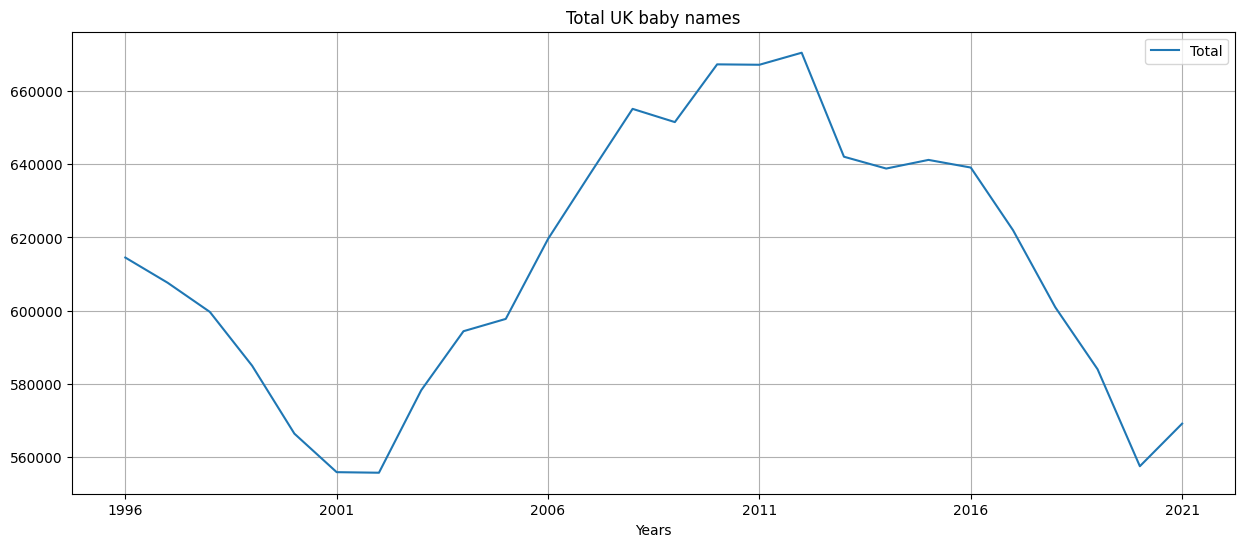

In [24]:
df_totals.plot(kind="line",title="Total UK baby names",figsize=(15,6),grid=True)
plt.show()

<AxesSubplot: title={'center': 'UK baby count for selected names'}, xlabel='Year'>

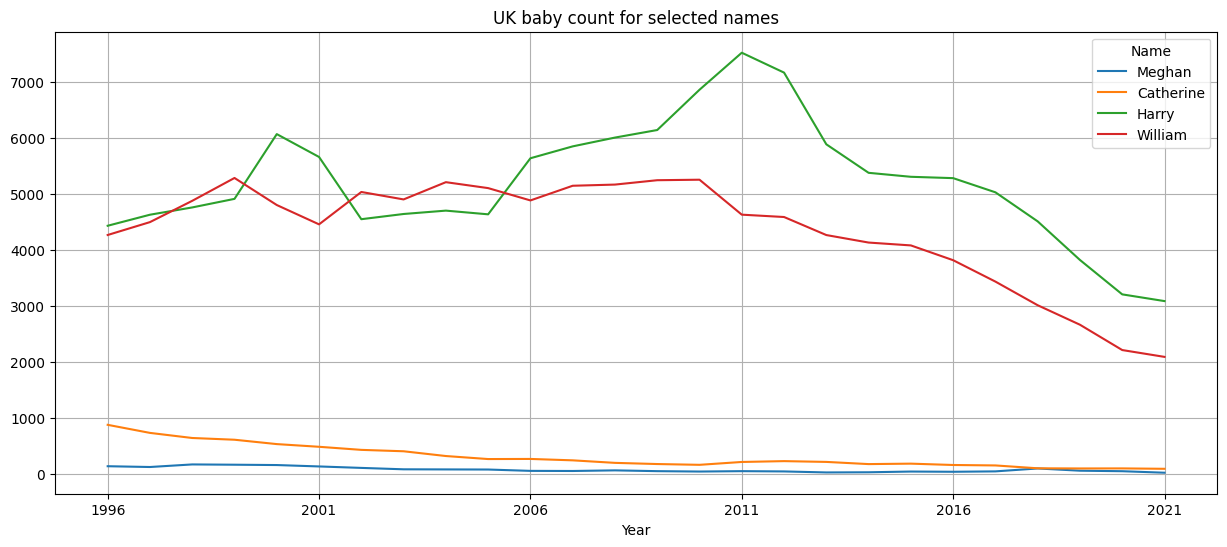

In [25]:
df_family_counts.plot(title="UK baby count for selected names",figsize=(15,6),grid=True)

(1500.0, 1.0)

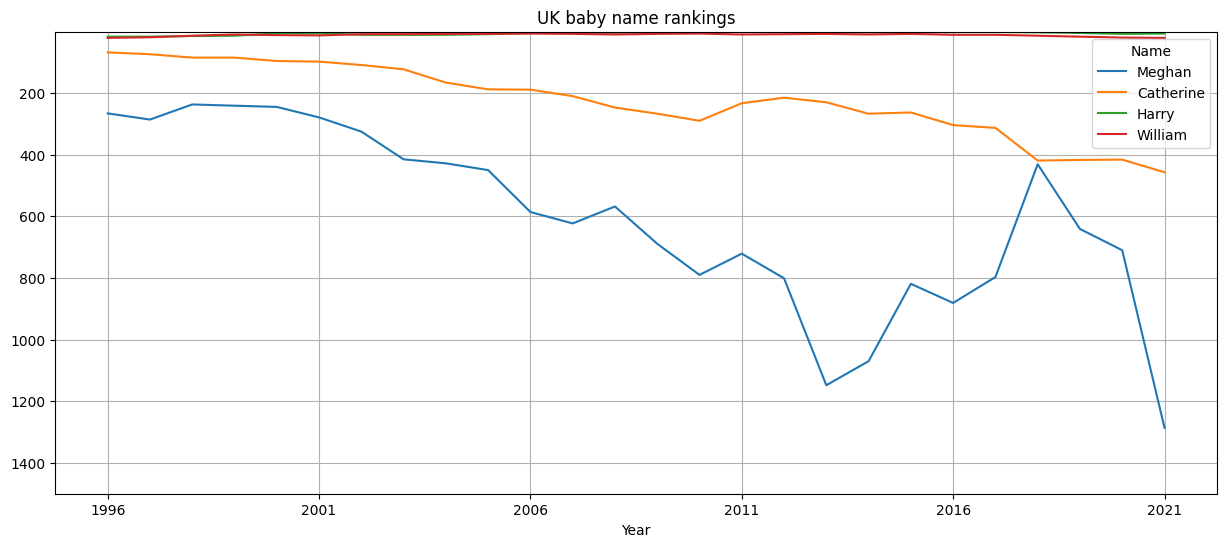

In [26]:
df_family_ranks.plot(title="UK baby name rankings",figsize=(15,6),grid=True)
plt.ylim(1500,1)

<AxesSubplot: title={'center': 'Name Popularity % Change'}, xlabel='Year'>

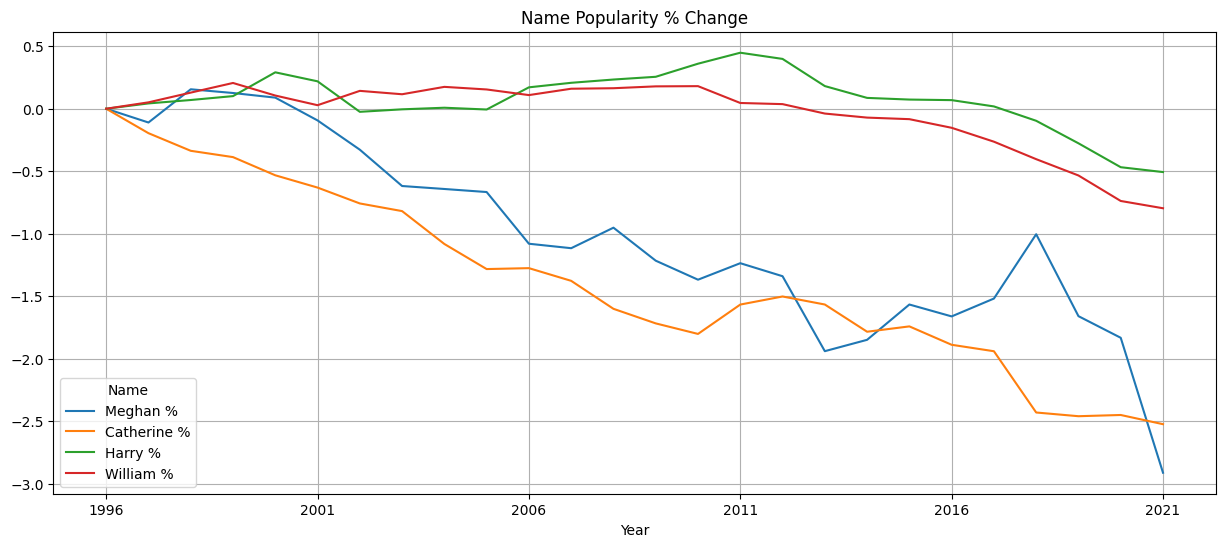

In [27]:
df_family_diff.plot(title="Name Popularity % Change",figsize=(15,6),grid=True)

## Seaborn Charts
---

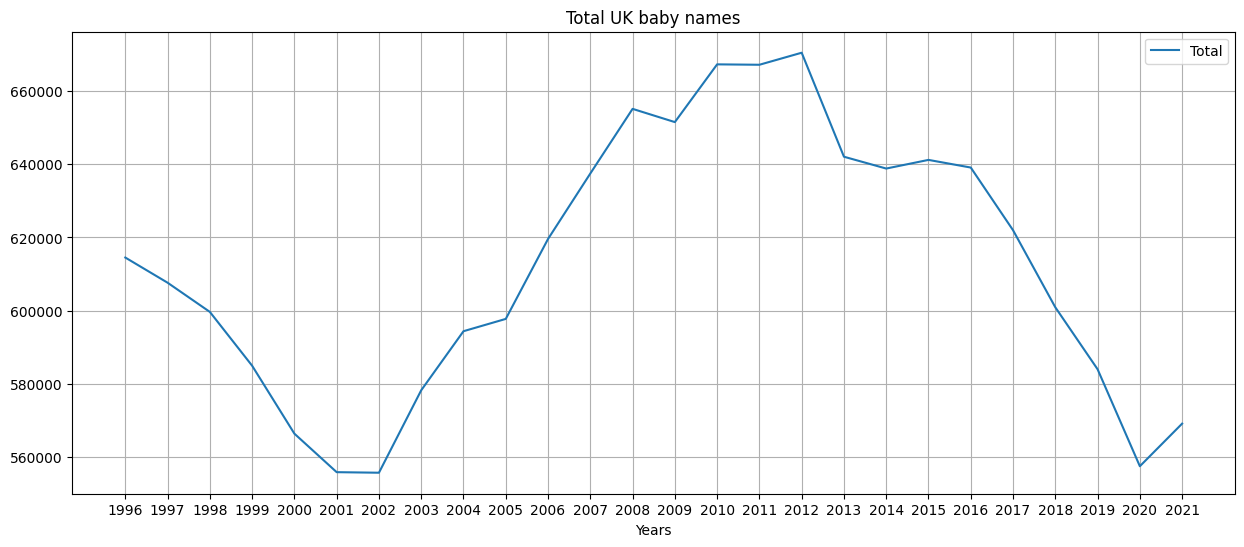

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df_totals).set(title="Total UK baby names")
plt.grid(True)


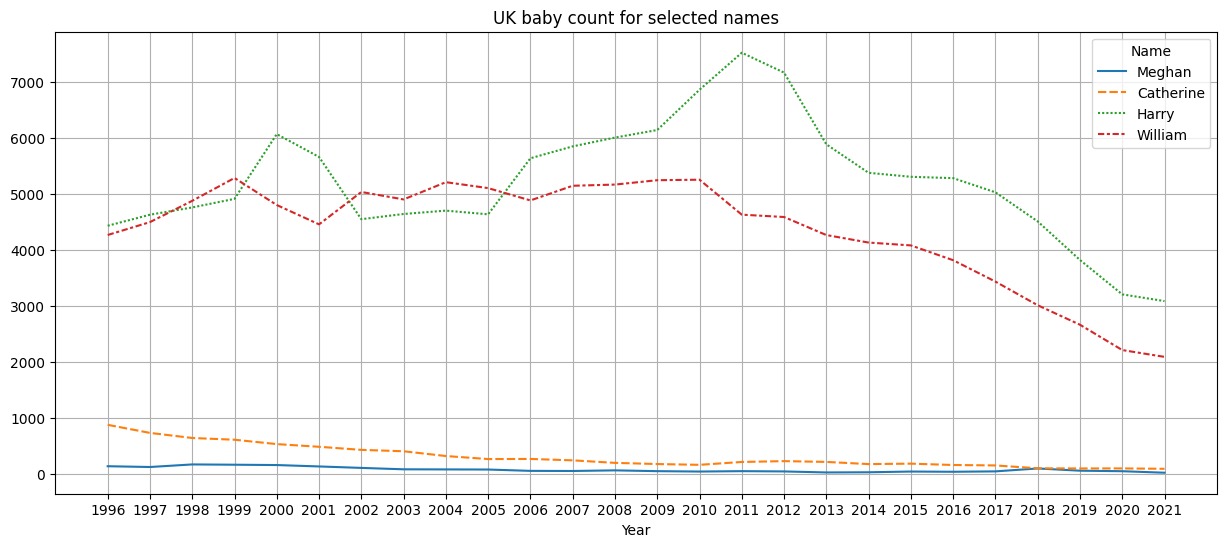

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df_family_counts).set(title="UK baby count for selected names")
plt.grid(True)

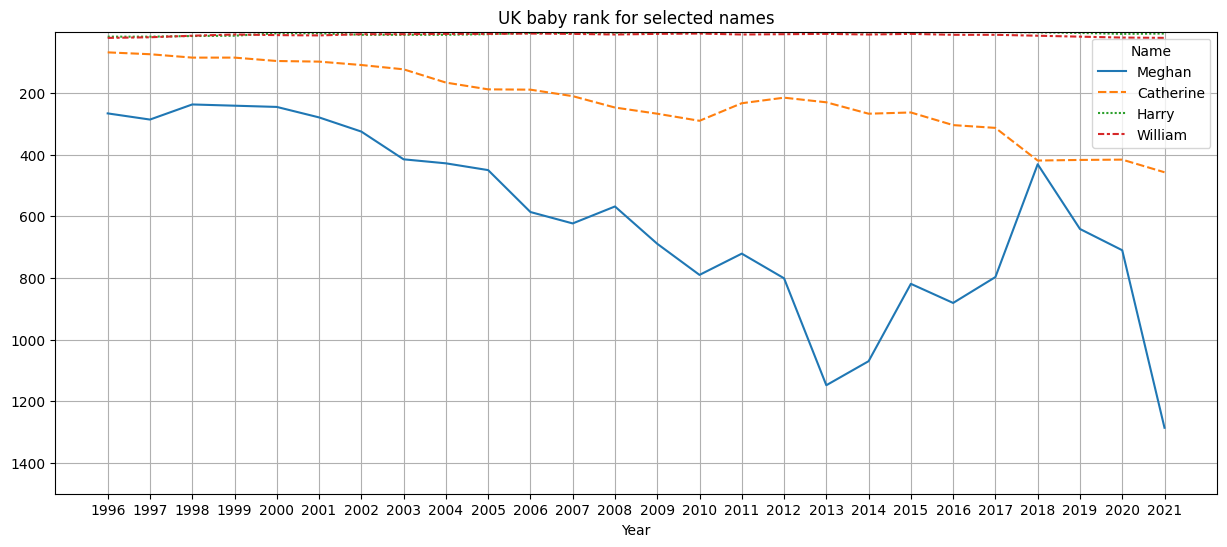

In [30]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(df_family_ranks).set(title="UK baby rank for selected names")
plt.ylim(1500,1)
plt.grid(True)

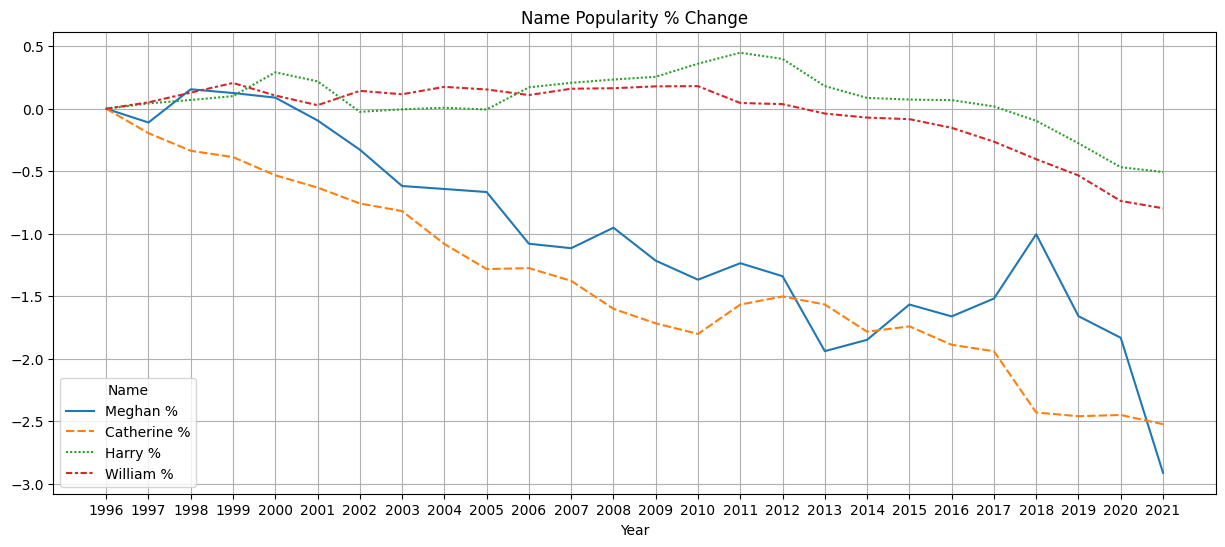

In [31]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(df_family_diff).set(title="Name Popularity % Change")
plt.grid(True)

## Plotly Charts
---

In [32]:
px.line(df_totals, title = "Total UK baby names")

In [33]:
px.line(df_family_counts, title="UK baby count for selected names")

In [34]:
fig = px.line(df_family_ranks, title="UK baby rank for selected names")
fig.update_yaxes(autorange="reversed")

In [35]:
px.line(df_family_diff, title="Name Popularity % Change")

## Conclusion
---

Harry and William are popular royal names rarely out of the top 20.  Harry is the only name to have reached the top spot, not once but twice. William on the other hand has only reached number 7 and is currently out of the top 20 at position 21.

Catherine and Meghan are not popular names, they have never been in the top 20. Both Catherine amd Meghan have been in slow decline since the late 90's.  Both names received a boost during their respective royal weddings.

2021 see all royal names at their lowest rankings, with the exception of Harry who still has a top 10 position at number 7.

## Limitation of investigation
---
The obvious limitation is that of alternative name spelling and aliases.  Meghan has many different spellings in the ONS dataset (Megan, Meggan, Megann, etc). Catherine is also commonly know as Kate. The code currently doesn't allow for these aliases.

From the start the code was designed to be parameter driven and to avoid any hardcoding, this would allow the codebase to be reused for similar name analysis. Adding parameters to allow for alias checking is a level of complexity that maybe added in the future.